In [1]:
import proplot as pplt
import numpy as np

In [2]:
def read_histogram_data(file_path:str)->dict:
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    diseases_data = {}
    current_disease = ''
    
    for i, line in enumerate(lines):
            line = line.strip()
            if line.startswith("Disease:"):
                current_disease = line.split(": ")[1]
                reading_disease_name = True
            elif reading_disease_name and not line.startswith("Bin Edges:"):
                current_disease += ' ' + line  # Append the continued disease name
            elif line.startswith("Bin Edges:"):
                reading_disease_name = False  # Stop reading the disease name
                bin_edges = np.array([float(x) for x in lines[i+1].split()])
                diseases_data[current_disease] = {'bins': bin_edges}
            elif line.startswith("Negative Values:"):
                values_neg = np.array([float(x) for x in lines[i+1].split()])
                diseases_data[current_disease]['neg'] = values_neg
            elif line.startswith("Positive Values:"):
                values_pos = np.array([float(x) for x in lines[i+1].split()])
                diseases_data[current_disease]['pos'] = values_pos

    return diseases_data


In [6]:
disease_data = read_histogram_data('age_distribution_all_25.txt')
# sort by key
map_name_dict = {'basal\ncell\ncarcinoma':'basal cell\ncarcinoma', 'fetal macrosomia':'large\nfetus',
            'FGR':'fetal\ngrowth\nrestriction', 'pain':'pain\ntreatment', 'infection\ngeneral':'general\ninfection',
            'alzheimers':'alzheimer\'s disease',
                 }
disease_data = {map_name_dict.get(k, k): disease_data[k] for k in disease_data}
disease_data = {k: disease_data[k] for k in sorted(disease_data)}
# select the first n elements 
#n = 25
#disease_data = {k: disease_data[k] for k in list(disease_data.keys())[:n]}

In [7]:
disease_data.keys()

dict_keys(["alzheimer's disease", 'anafylaxia', 'arrhythmia', 'basal cell carcinoma', 'breast cancer', 'colon cancer', 'death', 'depression', 'diabetes', 'diarrhea', 'fetal\ngrowth\nrestriction', 'infection general', 'large\nfetus', 'lung cancer', 'major bleeding', 'myocardial infarction', 'osteonecrosis', 'pain\ntretment', 'pancreatic cancer', 'placental insufficiency', 'pneumonia', 'preterm birth', 'schizophrenia', 'sleep disorder', 'stroke'])

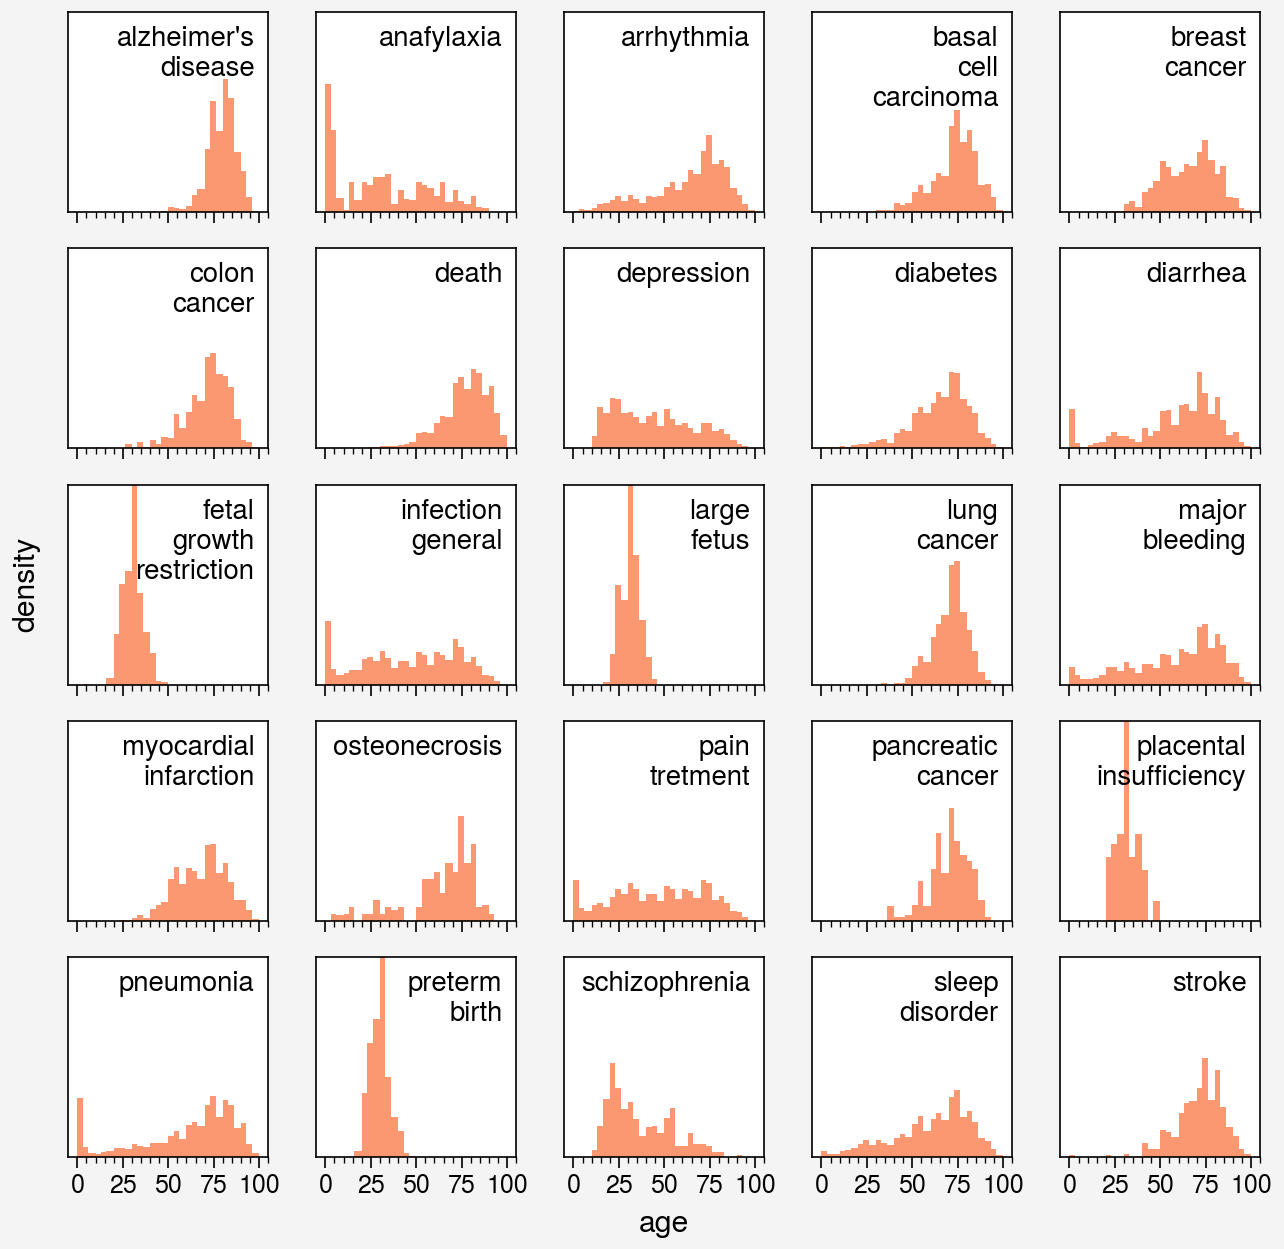

In [9]:
def plot_and_save(disease_data:dict, map_name_dict: dict = None):
    if map_name_dict is None:
        map_name_dict ={}
    pplt.rc.update(titleborder=False,titleloc='upper right',)
    fig = pplt.figure(refwidth=1, span=True, share='all')
    axs = fig.subplots(nrows=5, ncols=5)
    for i, (ax, (name, data)) in enumerate(zip(axs, disease_data.items())):
        bin_edges = data['bins']
        
        p = ax.hist(bin_edges[:-1], bins=bin_edges, weights=data['pos'], color='#fc8d62', alpha=.9, 
                  label='positive' if i==0 else None,density=True)
        #n = ax.hist(bin_edges[:-1], bins=bin_edges, weights=data['neg'], color='#8da0cb', alpha=.5,
         #         label='negative' if i==0 else None, density=True)
        
        ax.set_yticklabels([])
        ax.set_yticks([])
        name = name.replace(' ','\n')
        name = map_name_dict.get(name, name)
        ax.format(title=name)
        ax.set_ylim(0,.09)
#        ymax = max(np.max(p[0]), np.max(n[0]))
        #ax.set_ylim(0, 1.1*ymax)
        
    axs.format(
        #suptitle='Age Distribution on the Train+Val Set',
        xlabel='age', ylabel='density', ylabelpad=10,
        grid=False, xticks=25, xlabelsize='large', ylabelsize='large'
    )

    # fig.legend(ncols=2, center=True, frame=False, loc='b')
    # increase xlabel font size

    fig.savefig('age_dist_train.png', dpi=300, bbox_inches='tight')
    pplt.rc.reset()

plot_and_save(disease_data, {})

In [ ]:
n = 9
disease_data = {k: disease_data[k] for k in list(disease_data.keys())[:n]}

In [96]:
disease_data['basal cell carcinoma']['xlim'] = (25, 100)
disease_data['breast cancer']['xlim'] = (25, 100)
disease_data['FGR']['xlim'] = (16, 50)
disease_data['depression']['titleloc']='upper right'
disease_data['depression']['xlim'] = (10, 100)
disease_data['alzheimers']['xlim'] = (50, 100)

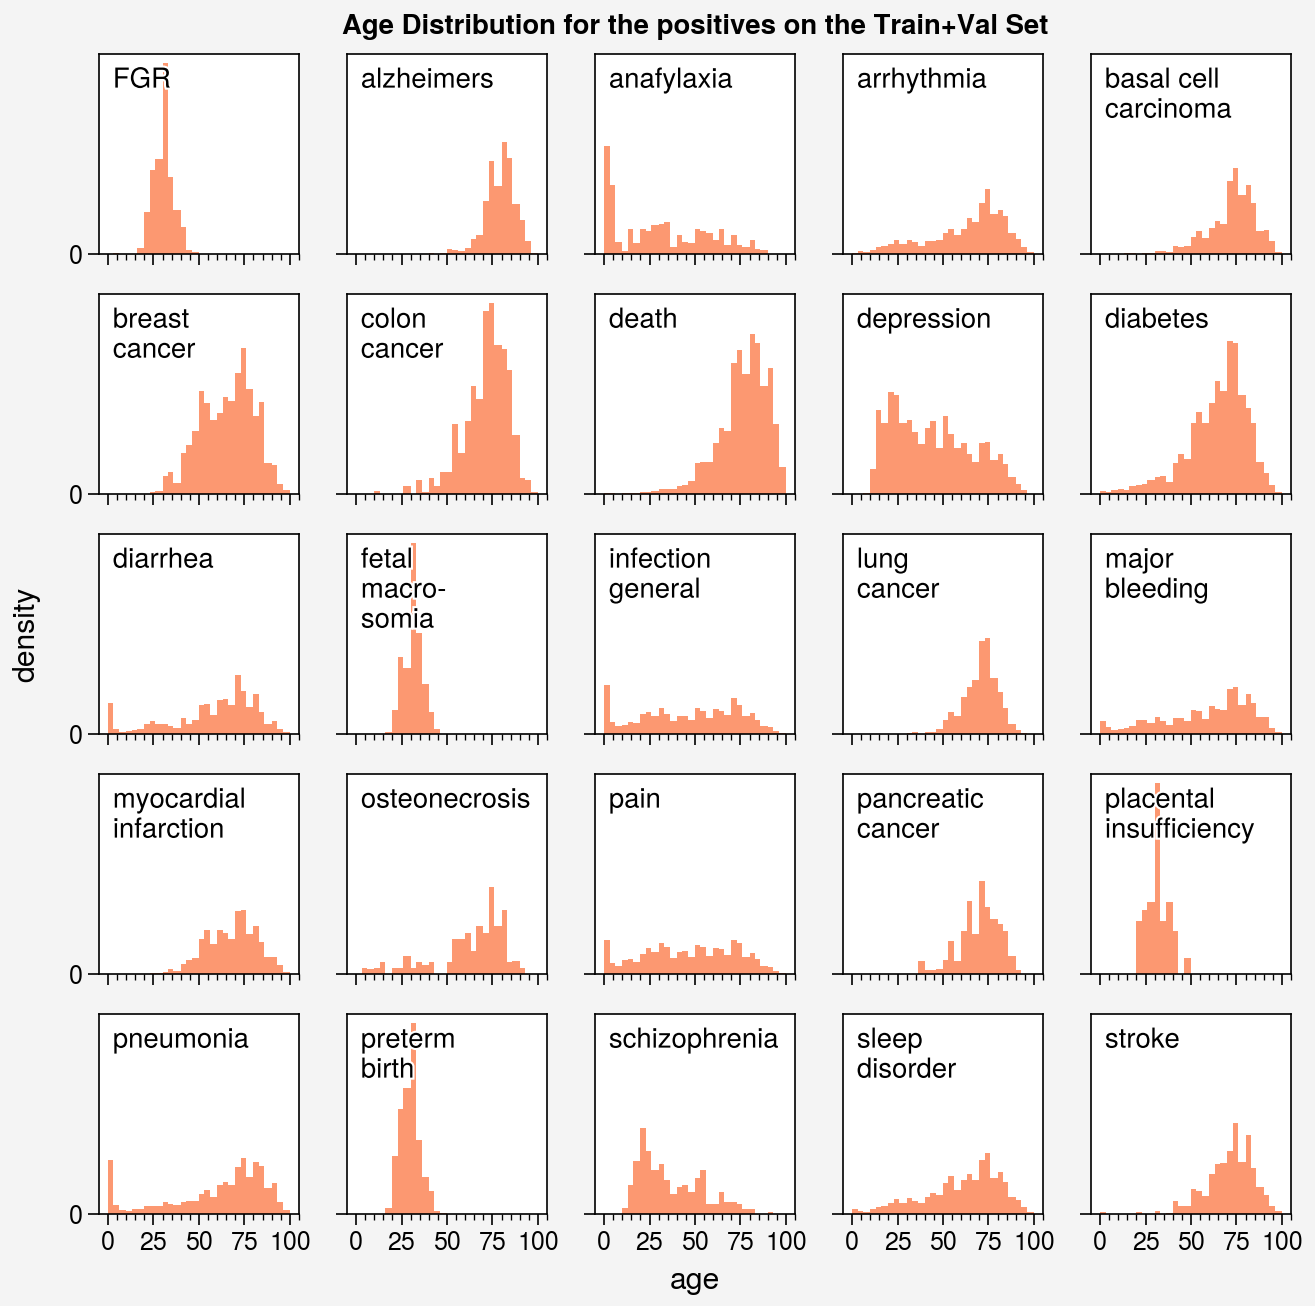

In [116]:
def plot_and_save_not_shared(disease_data:dict, map_name_dict: dict = None):
    if map_name_dict is None:
        map_name_dict ={}
    pplt.rc.update(titleborder=True, titleloc='upper right',)
    #pplt.rc['subplots.share']='labels'
    fig = pplt.figure(refwidth=1, span=True, share=True)
    axs = fig.subplots(nrows=5, ncols=5)
    for i, (ax, (name, data)) in enumerate(zip(axs, disease_data.items())):
        bin_edges = data['bins']
        
        p = ax.hist(bin_edges[:-1], bins=bin_edges, weights=data['pos'], color='#fc8d62', alpha=.9, 
                  label='positive' if i==0 else None,density=True)
        #n = ax.hist(bin_edges[:-1], bins=bin_edges, weights=data['neg'], color='#8da0cb', alpha=.5,
         #         label='negative' if i==0 else None, density=True)
        
        #ax.set_yticklabels([])
        #ax.set_yticks([])
        #if 'xlim' in data:
         #   ax.set_xlim(data['xlim'])
        name = name.replace(' ','\n')
        name = map_name_dict.get(name, name)
        ax.format(title=name, titleloc=data.get('titleloc', 'upper left'))
        #ax.set_ylim(0,.09)
#        ymax = max(np.max(p[0]), np.max(n[0]))
        #ax.set_ylim(0, 1.1*ymax)
    
    axs.format(
        suptitle='Age Distribution for the positives on the Train+Val Set',
        xlabel='age', ylabel='density', ylabelpad=10,
        grid=False, xticks=25,yticks=4, xlabelsize='large', ylabelsize='large'
    )

    # fig.legend(ncols=2, center=True, frame=False, loc='b')
    # increase xlabel font size

    fig.savefig('age_dist_train.png', dpi=300, bbox_inches='tight')
    pplt.rc.reset()
map_name_dict = {'basal\ncell\ncarcinoma':'basal cell\ncarcinoma', 'fetal\nmacrosomia':'fetal\nmacro-\nsomia',
                 }
plot_and_save_not_shared(disease_data, map_name_dict)

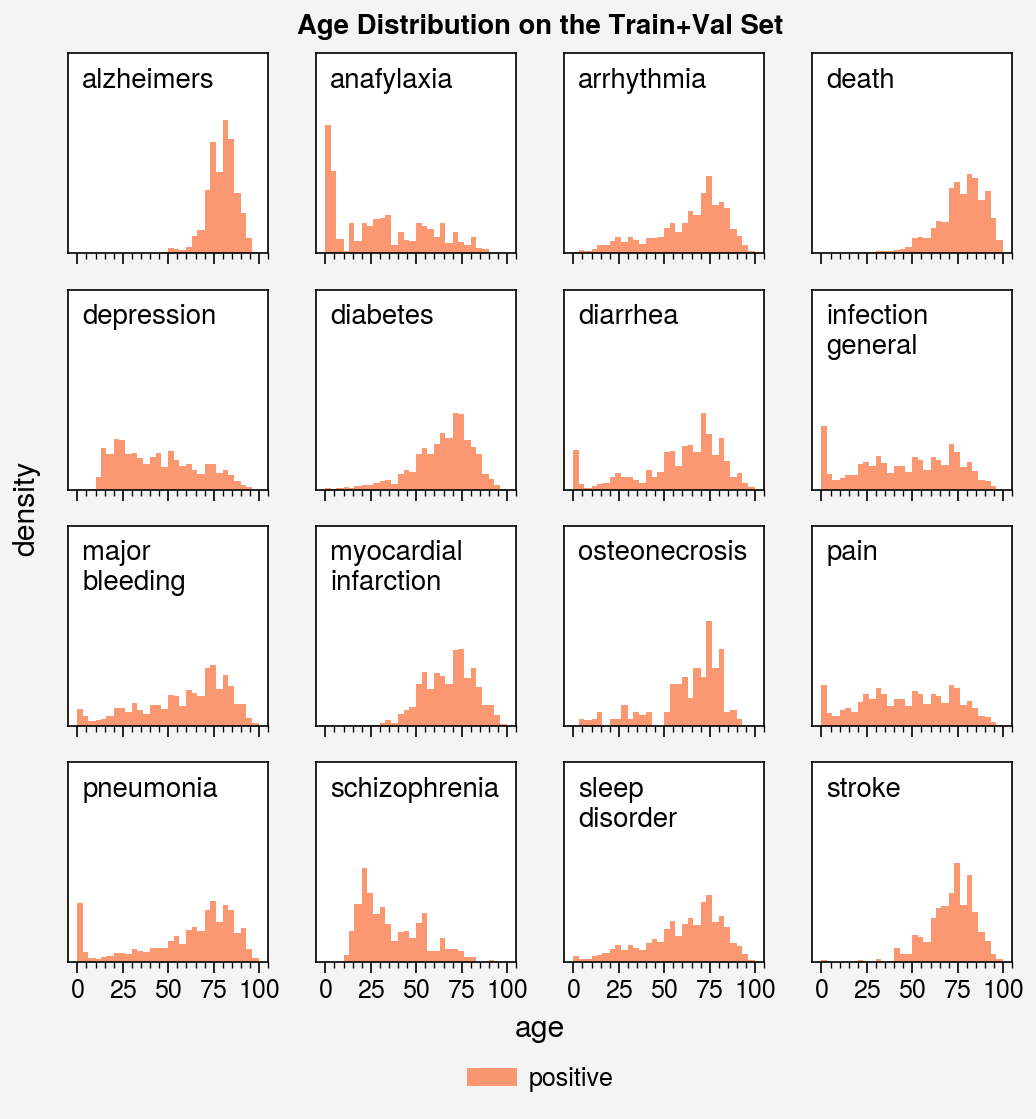

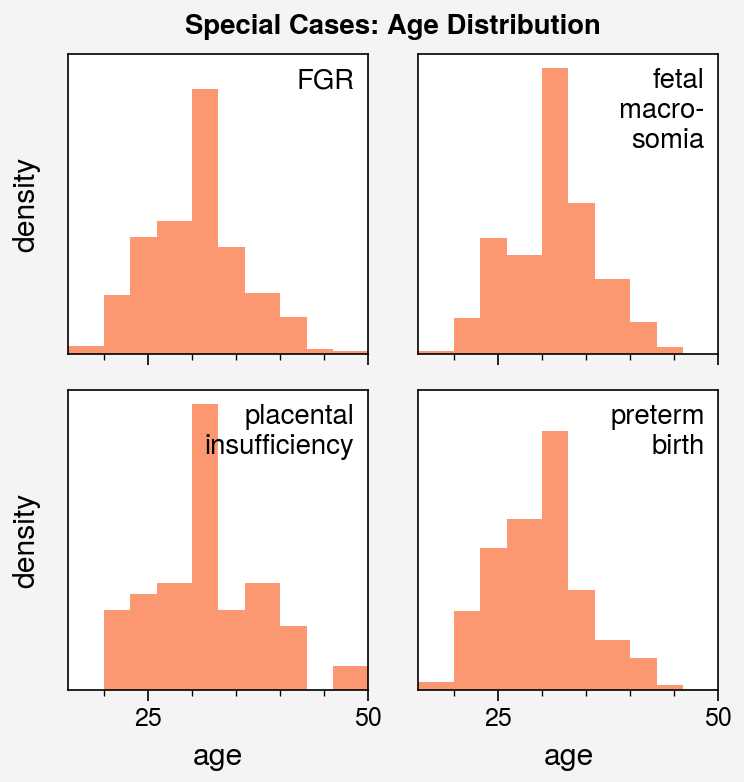

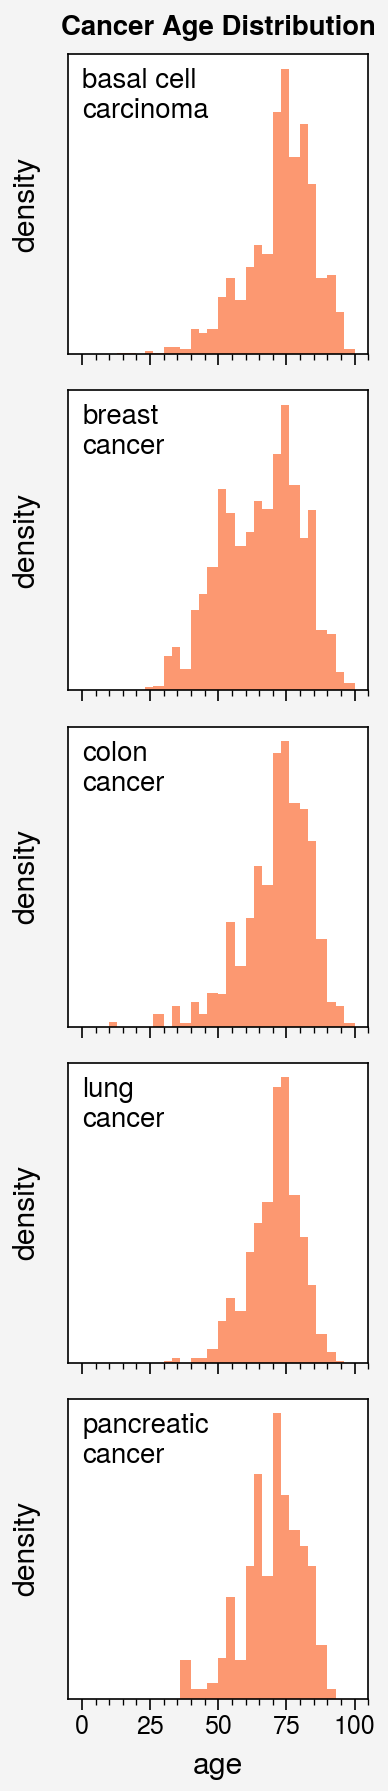

In [99]:
import proplot as pplt

def plot_and_save(disease_data: dict, map_name_dict: dict = None):
    if map_name_dict is None:
        map_name_dict = {}

    # List of diseases for the extra 2x2 plot
    extra_diseases = ['FGR', 'preterm birth', 'placental insufficiency', 'fetal macrosomia']
    cancers = ['basal cell carcinoma', 'lung cancer', 'breast cancer', 'pancreatic cancer', 'colon cancer']
    # Filter out the diseases for the extra plot
    main_diseases_data = {k: v for k, v in disease_data.items() if k not in extra_diseases and k not in cancers}
    extra_diseases_data = {k: v for k, v in disease_data.items() if k in extra_diseases}
    cancers_data = {k: v for k, v in disease_data.items() if k in cancers}

    #pplt.rc.update(titleborder=False, titleloc='upper right',)
    fig = pplt.figure(refwidth=1, span=True, share='all')
    axs = fig.subplots(nrows=4, ncols=4)

    # Plot main diseases
    for i, (ax, (name, data)) in enumerate(zip(axs, main_diseases_data.items())):
        bin_edges = data['bins']
        ax.hist(bin_edges[:-1], bins=bin_edges, weights=data['pos'], color='#fc8d62', alpha=.9, label='positive' if i==0 else None, density=True)
        #ax.hist(bin_edges[:-1], bins=bin_edges, weights=data['neg'], color='#8da0cb', alpha=.5, label='negative' if i==0 else None, density=True)

        ax.set_yticklabels([])
        ax.set_yticks([])
        name = name.replace(' ', '\n')
        name = map_name_dict.get(name, name)
        ax.format(title=name)
        ax.set_ylim(0, .09)

    # Add the extra 2x2 plot for the specified diseases
    fig_extra = pplt.figure(refwidth=1.5, span=False)
    axs_extra = fig_extra.subplots(nrows=2, ncols=2)

    for ax, (name, data) in zip(axs_extra, extra_diseases_data.items()):
        bin_edges = data['bins']
        ax.hist(bin_edges[:-1], bins=bin_edges, weights=data['pos'], color='#fc8d62', alpha=.9, density=True)
        #ax.hist(bin_edges[:-1], bins=bin_edges, weights=data['neg'], color='#8da0cb', alpha=.5, density=True)

        ax.set_yticklabels([])
        ax.set_yticks([])
        name = name.replace(' ', '\n')
        name = map_name_dict.get(name, name)
        ax.format(title=name)
        # Custom y-limits can be set here based on the data scale of these diseases

    fig_cancers = pplt.figure(refwidth=1.5, span=False)
    axs_cancers = fig_cancers.subplots(nrows=5, ncols=1)
    for ax, (name, data) in zip(axs_cancers, cancers_data.items()):
        bin_edges = data['bins']
        ax.hist(bin_edges[:-1], bins=bin_edges, weights=data['pos'], color='#fc8d62', alpha=.9, density=True)
        #ax.hist(bin_edges[:-1], bins=bin_edges, weights=data['neg'], color='#8da0cb', alpha=.5, density=True)

        ax.set_yticklabels([])
        ax.set_yticks([])
        name = name.replace(' ', '\n')
        name = map_name_dict.get(name, name)
        ax.format(title=name)


    axs_cancers.format(suptitle='Cancer Age Distribution', xlabel='age', ylabel='density', ylabelpad=10, 
                       grid=False, xticks=25, xlabelsize='large', ylabelsize='large', titleborder=False, titleloc='upper left')

    axs.format(
        suptitle='Age Distribution on the Train+Val Set',
        xlabel='age', ylabel='density', ylabelpad=10,
        grid=False, xticks=25, xlabelsize='large', ylabelsize='large', titleloc='upper left', titleborder=False,
    )
    axs_extra.format(
        suptitle='Special Cases: Age Distribution',
        xlabel='age', ylabel='density', ylabelpad=10,
        grid=False, xticks=25, xlabelsize='large', ylabelsize='large', xlim=(16,50), titleloc='upper right', titleborder=False,
    )

    fig.legend(ncols=2, center=True, frame=False, loc='b')
    #fig_extra.legend(ncols=2, center=True, frame=False, loc='b')

    # Uncomment to save figures
    # fig.savefig('age_dist_train_main.png', dpi=300, bbox_inches='tight')
    # fig_extra.savefig('age_dist_train_extra.png', dpi=300, bbox_inches='tight')

    pplt.rc.reset()

# Assuming disease_data is already defined and populated
plot_and_save(disease_data, map_name_dict)
